# Student Alcohol Consumption:Machine Learning Problems

In [707]:
#importing all the important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron


from sklearn.model_selection import cross_val_score

In [708]:
#Load the data
df1=pd.read_csv("student-mat.csv")
df2=pd.read_csv("student-por.csv")

In [709]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [710]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [711]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [712]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [713]:
#combining both the dataframe
frames=[df1,df2]
data=pd.concat(frames)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [714]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null

## Correlation between features
    

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

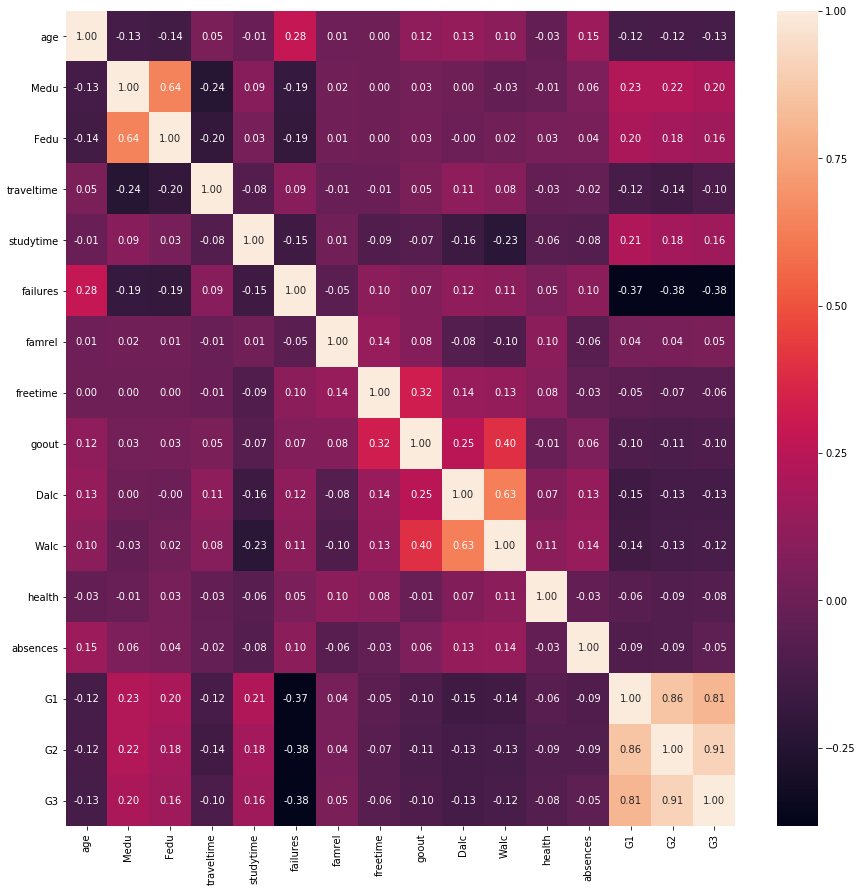

In [715]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

It can be seen from correlation map that only exam scores(G1,G2,G3) are highly correlated with each other.

# Visualisation

## Sex

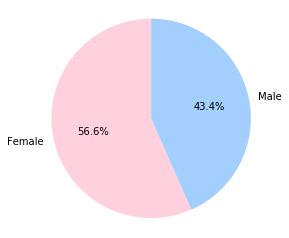

In [716]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

## Age

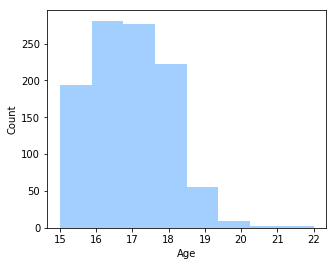

In [717]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(data['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

## Weekly study time

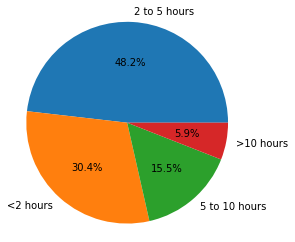

In [718]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

## Romantic Relationship

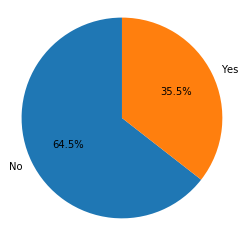

In [719]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

Let's see if the presence of love and relationships affects the number of absences.

/home/anand/.virtualenvs/cv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

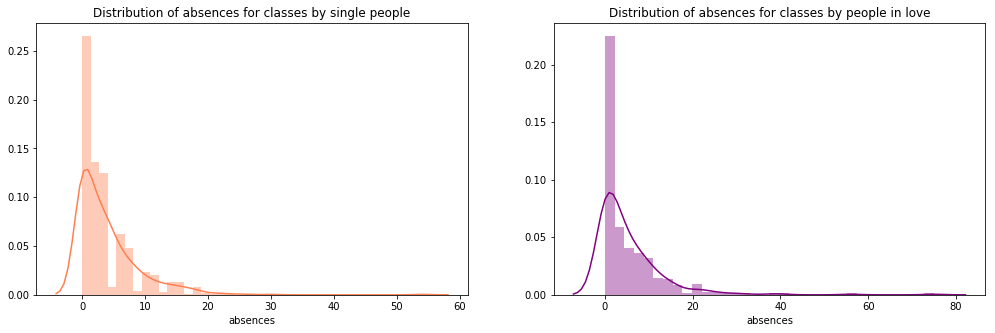

In [720]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

Oh. "Lovers do not notice the clock." Single people miss fewer classes.

Let's see if this affects the final grade

Text(0.5, 1.0, 'Distribution of grades in people in love')

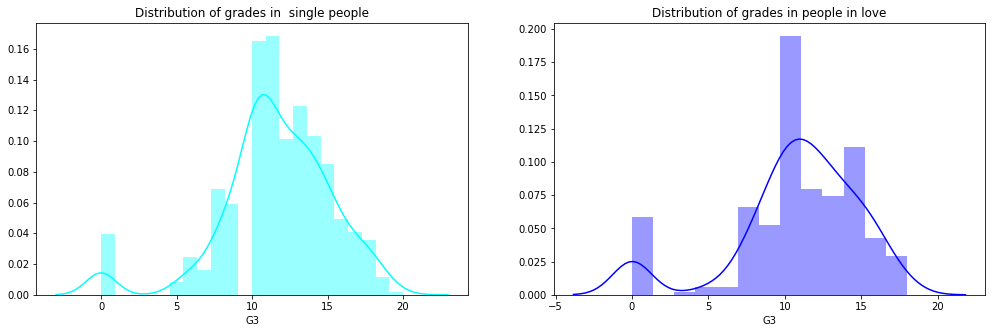

In [721]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

The final grades of number of single students are slightly higher than those who are in a romantic relationship. Of course this is due to the fact that teenagers in love want to spend more time with girlfriend or boyfriend than with a textbook.

### Student address

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

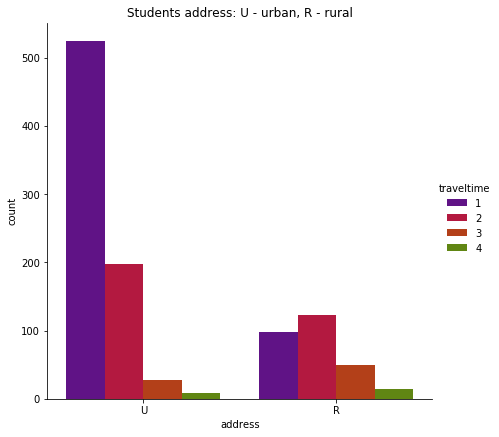

In [722]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data, height = 6)
plt.title("Students address: U - urban, R - rural")

Most of the students live in the city. Few students take long to get to school.

## Weekend Alcohol Consumption Distribution

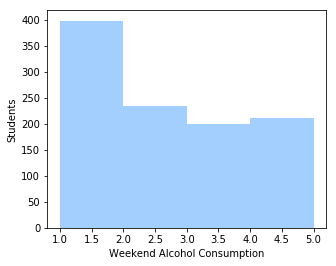

In [723]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(data['Walc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=4)
ax = ax.set(ylabel="Students", xlabel="Weekend Alcohol Consumption")

## Alcohol Consumption and Health

/home/anand/.virtualenvs/cv/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


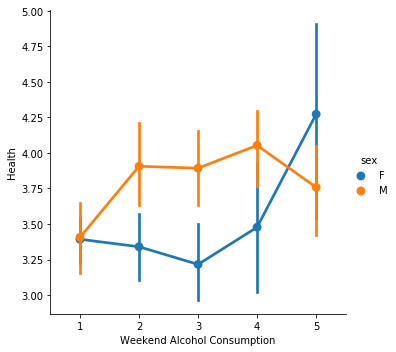

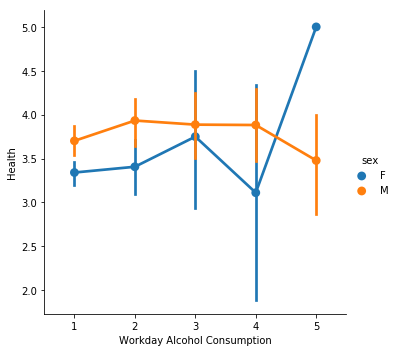

In [724]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=data)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=data)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

## Alcohol Consumption and Final Grade

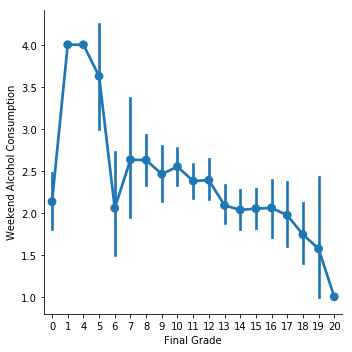

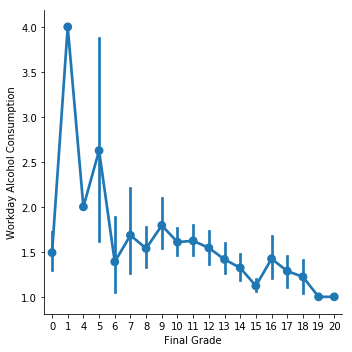

In [725]:
plot1 = sns.factorplot(x="G3", y="Walc", data=data)
plot1.set(ylabel="Weekend Alcohol Consumption", xlabel="Final Grade")

plot2 = sns.factorplot(x="G3", y="Dalc", data=data)
plot2.set(ylabel="Workday Alcohol Consumption", xlabel="Final Grade")

In [726]:
print(data.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [727]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [728]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Modeling

In [729]:

X = data.drop(["G3"],axis=1)
y = data["G3"]
X = pd.get_dummies(X)

In [730]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [731]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 145 to 289
Data columns (total 58 columns):
age                  835 non-null int64
Medu                 835 non-null int64
Fedu                 835 non-null int64
traveltime           835 non-null int64
studytime            835 non-null int64
failures             835 non-null int64
famrel               835 non-null int64
freetime             835 non-null int64
goout                835 non-null int64
Dalc                 835 non-null int64
Walc                 835 non-null int64
health               835 non-null int64
absences             835 non-null int64
G1                   835 non-null int64
G2                   835 non-null int64
school_GP            835 non-null uint8
school_MS            835 non-null uint8
sex_F                835 non-null uint8
sex_M                835 non-null uint8
address_R            835 non-null uint8
address_U            835 non-null uint8
famsize_GT3          835 non-null uint8
famsize_LE3  

### Linear Regression

In [732]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)
y_pred=linReg.predict(X_test)
acc_lin=round(linReg.score(X_test,y_test)*100,2)

### Ridge

In [733]:
Rdg=Ridge()
Rdg.fit(X_train,y_train)
y_pred=Rdg.predict(X_test)
acc_ridge=round(Rdg.score(X_test,y_test)*100,2)

### Lasso

In [734]:
Las=Lasso()
Las.fit(X_train,y_train)
y_pred=Las.predict(X_test)
acc_Las=round(Las.score(X_test,y_test)*100,2)

### DecisionTreeRegressor

In [735]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)

### RandomForestRegressor

In [736]:
random_forest =  RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train) 
y_pred = random_forest.predict(X_test) 
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

## Which is the best Model ?

In [737]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 
              'RandomForestRegressor', 'DecisionTreeRegressor' 
              ],
    'Score': [acc_lin, acc_ridge, acc_Las, 
              acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
84.44,Lasso
82.88,RandomForestRegressor
82.85,Ridge
82.84,Linear Regression
63.31,DecisionTreeRegressor


## Cross validation

In [738]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso','RandomForestRegressor']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso(),
            RandomForestRegressor(n_estimators=100)]

In [739]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X_test, y_test, cv=10).mean())

DecisionTreeRegressor: 0.5419544518293493
LinearRegression: 0.7914713913694414
Ridge: 0.7943901521192309
Lasso: 0.8462914412844835
RandomForestRegressor: 0.7861744452628152


As Lasso has the best cross validation score so we will use Lasso for further prediction

In [740]:
predictions = cross_val_predict(Las, X_test, y_test, cv=3)